# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Arya Gunawan
- **Email:** aryakk008@gmail.com
- **ID Dicoding:** aryagunawan_12

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren PM2.5 dan PM10 selama periode 2013-2017?
2. Bagaimana dampak tingkat polusi udara terhadap kondisi lingkungan?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

## Data Wrangling

### Gathering Data

In [9]:
df_Dingling = pd.read_csv("Dataset/PRSA_Data_Dingling_20130301-20170228.csv")

In [11]:
df_Dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [13]:
df_Dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [15]:
df_Dingling.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling
35063,35064,2017,2,28,23,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling


**Insight:**
- Dataset memiliki 18 kolom dan 35.064 baris dengan berbagai jenis data (numerik & kategorikal)
- Kolom station hanya berisi satu nilai unik, yaitu "Dingling", sehingga tidak berkontribusi dalam analisis prediktif.

### Assessing Data

In [19]:
df_Dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [21]:
df_Dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset `df_Dingling` berisi 35,064 entri dengan 18 kolom yang mencakup parameter kualitas udara dan kondisi cuaca. Terlihat bahwa beberapa parameter utama kualitas udara memiliki data kosong, ditandai dengan jumlah entri yang lebih sedikit dibandingkan total baris indeks. Untuk mengetahui jumlah data yang hilang secara lebih jelas, dapat digunakan fungsi `isna().sum()`.

In [24]:
df_Dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

**insight**
- Setelah mengetahui jumlah data yang hilang, langkah berikutnya adalah memeriksa adanya duplikasi data menggunakan fungsi `duplicated().sum()`.

In [27]:
df_Dingling.duplicated().sum()

0

**insight**
- Dataframe ini tidak mengandung duplikasi. Selanjutnya, kita akan menganalisis anomali data dengan melihat parameter statistiknya menggunakan fungsi `describe()`

In [30]:
df_Dingling.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


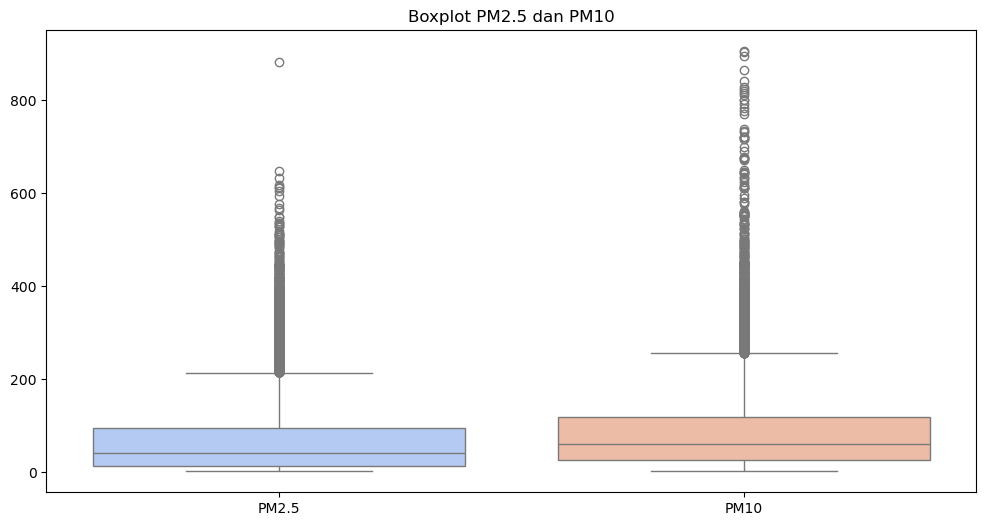

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_Dingling[['PM2.5', 'PM10']], palette='coolwarm')
plt.title('Boxplot PM2.5 dan PM10')
plt.show()


**insight**
- Asesmen data dari Stasiun Dingling (DLG) menunjukkan bahwa dataframe memiliki 17 kolom dengan total 35.064 baris
- Beberapa kolom parameter utama kualitas udara mengandung data kosong yang perlu diimputasi pada tahap berikutnya. Selain itu, tidak ditemukan anomali dalam struktur, tipe data, maupun nilai yang ada.

### Cleaning Data

In [34]:
df_Dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

imputasi pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM, dan wd. Imputasi akan dilakukan dengan metode interpolasi untuk mengisi data yang kosong berdasarkan data-data lain yang terisi sehingga nilainya tetap representatif dan tidak menimbulkan anomali. Khusus untuk parameter wd, imputasi dilakukan dengan menginputkan nilai mayoritas karena bukan merupakan nilai numerik, sehingga tidak bisa dilakukan interpolasi

In [37]:
miss_val = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

for i in miss_val:
  df_Dingling[i] = df_Dingling[i].interpolate(method='linear')

df_Dingling.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          2
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

masih terdapat data NO2 yang kosong dan tidak dapat terisi dengan metode interpolasi linier. Dikarenakan interpolasi linier mengisi data yang kosong berdasarkan isian data sebelumnya. Karena kolom yang kosong terdapat pada urutan awal, maka kolom tersebut tidak dapat diisi dengan metode interpolasi segingga tetap kosong nilainya.

In [40]:
df_Dingling[df_Dingling['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


Untuk mengatasi hal ini digunakan metode `bfill`

In [43]:
df_Dingling['NO2'].fillna(method='bfill', inplace=True)

C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\2455728913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Dingling['NO2'].fillna(method='bfill', inplace=True)
C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\2455728913.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Dingling['NO2'].fillna(method='bfill', inplace=True)


In [45]:
df_Dingling.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

Sekarang data NO2 telah terisi semua. Selanjutnya tinggal melakukan imputasi terhadap `wd`

In [48]:
df_Dingling.wd.fillna(df_Dingling.wd.mode()[0], inplace=True)
df_Dingling.isna().sum()

C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\3183806091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Dingling.wd.fillna(df_Dingling.wd.mode()[0], inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [50]:
df_Dingling.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.303589,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060293,1.854871
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296835,894.687311,58.624617,11.367457,10.226075,13.828895,0.752357,1.310748
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [101]:
print("Jumlah data duplikat sebelum dihapus:", df_Dingling.duplicated().sum())
df_Dingling.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah dihapus:", df_Dingling.duplicated().sum())

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


**insight**
- Imputasi dengan metode interpolasi berhasil dilakukan dan tidak menimbulkan anomali pada parameter statistiknya
- Kolom wd diimputasi dengan modus karena tidak dapat diinterpolasi

## Exploratory Data Analysis (EDA)

#### Mengonversi Tanggal dan Mengelompokkan Data

In [55]:
df_Dingling['date'] = pd.to_datetime(df_Dingling[['year', 'month', 'day', 'hour']])
df_Dingling.set_index('date', inplace=True)

#### Agregasi Data untuk Tren PM2.5 dan PM10

In [57]:
pm_trend = df_Dingling.resample('M')[['PM2.5', 'PM10']].mean()
pm_trend.head()

C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\3031146705.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_trend = df_Dingling.resample('M')[['PM2.5', 'PM10']].mean()


,PM2.5,PM10
date,,
2013-03-31,95.705645,109.645161
2013-04-30,55.700000,81.673958
2013-05-31,70.633737,111.598454
2013-06-30,86.342325,87.865936
2013-07-31,57.913342,60.401917


#### Analisis Dampak Polusi terhadap Lingkungan

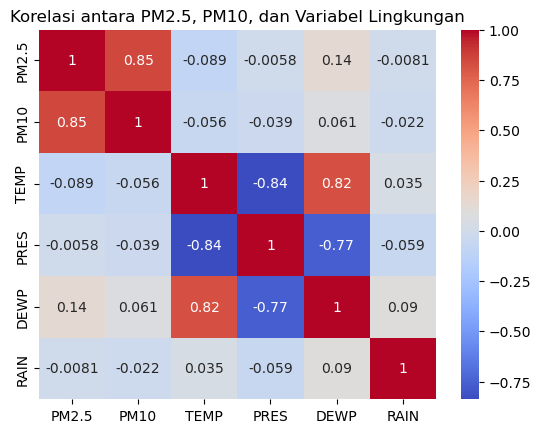

In [66]:
correlation = df_Dingling[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara PM2.5, PM10, dan Variabel Lingkungan')
plt.show()

#### Distribusi Polusi Udara

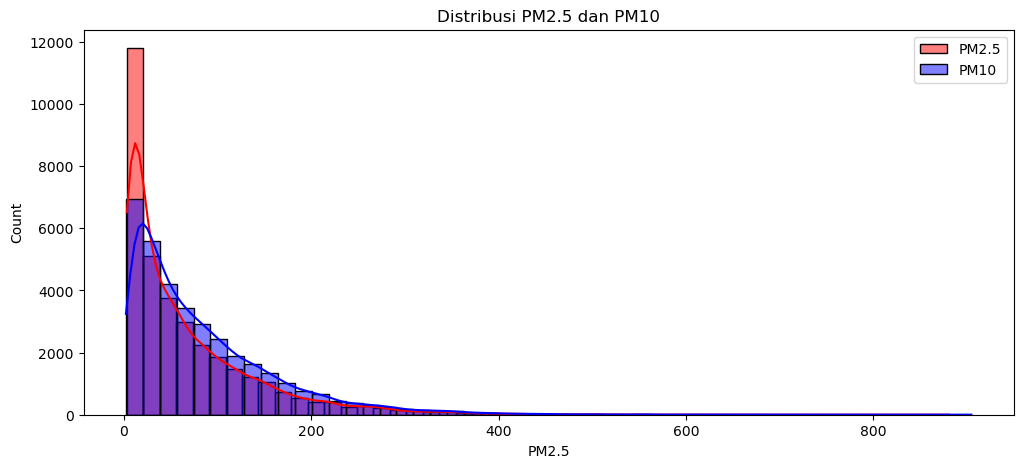

In [68]:
plt.figure(figsize=(12,5))
sns.histplot(df_Dingling['PM2.5'], bins=50, kde=True, color='red', label='PM2.5')
sns.histplot(df_Dingling['PM10'], bins=50, kde=True, color='blue', label='PM10')
plt.legend()
plt.title('Distribusi PM2.5 dan PM10')
plt.show()


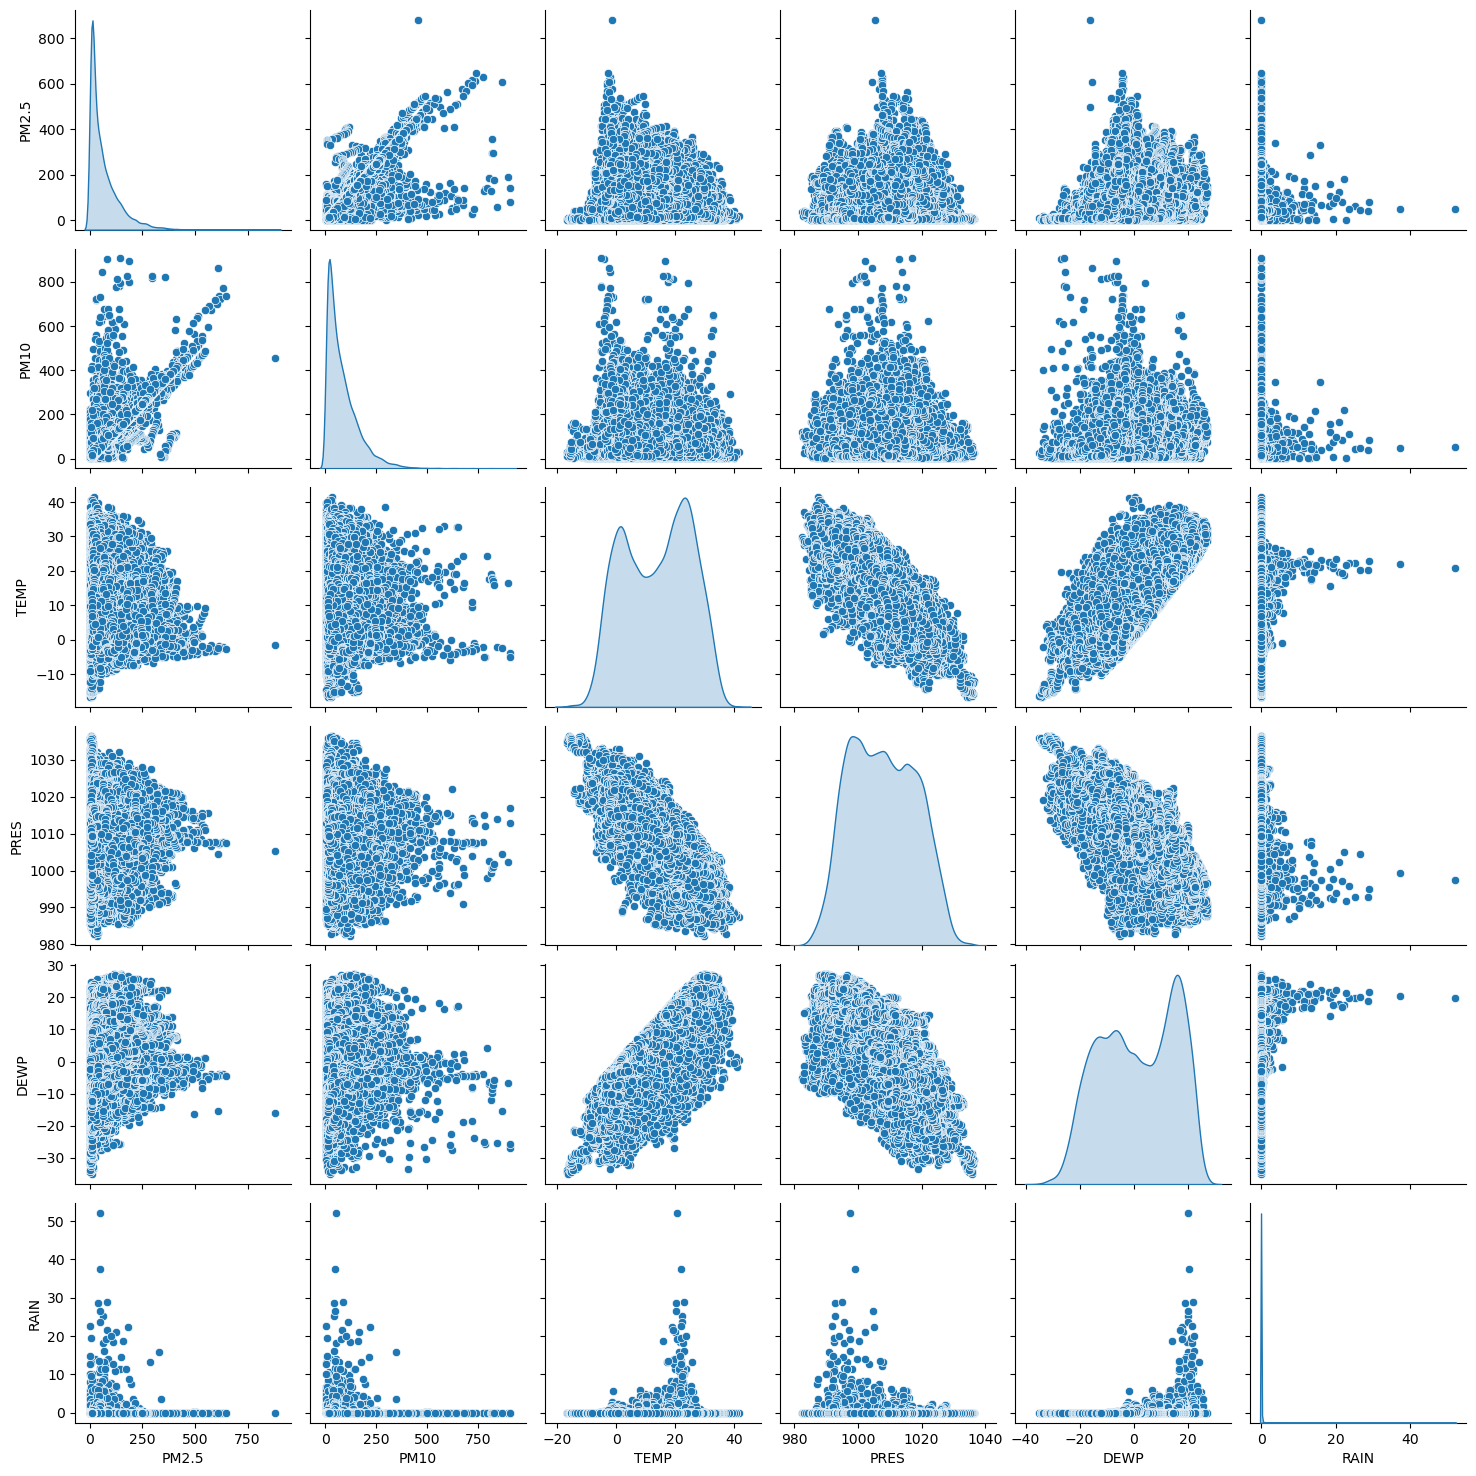

In [103]:
sns.pairplot(df_Dingling[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN']], diag_kind='kde')
plt.show()

**Insight:**
- Tren PM2.5 & PM10 (2013-2017), Konsentrasi PM2.5 dan PM10 menunjukkan pola fluktuatif dengan kemungkinan peningkatan pada musim tertentu
- Hubungan Polusi & Faktor Lingkungan, Polusi udara berkorelasi dengan suhu, tekanan udara, dan kelembaban, yang dapat memengaruhi kualitas udara
- Distribusi Polusi Udara, Sebaran PM2.5 dan PM10 cenderung tidak normal, dengan kemungkinan outlier pada level tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM2.5 dan PM10 selama periode 2013-2017?

Mengelompokkan data berdasarkan tahun dan menghitung rata-rata konsentrasi PM2.5 dan PM10 untuk setiap tahun.

C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\2601659061.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df_Dingling.resample('M')['PM2.5'].mean(), ax=ax[0], color='red')
C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\2601659061.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df_Dingling.resample('M')['PM10'].mean(), ax=ax[1], color='blue')


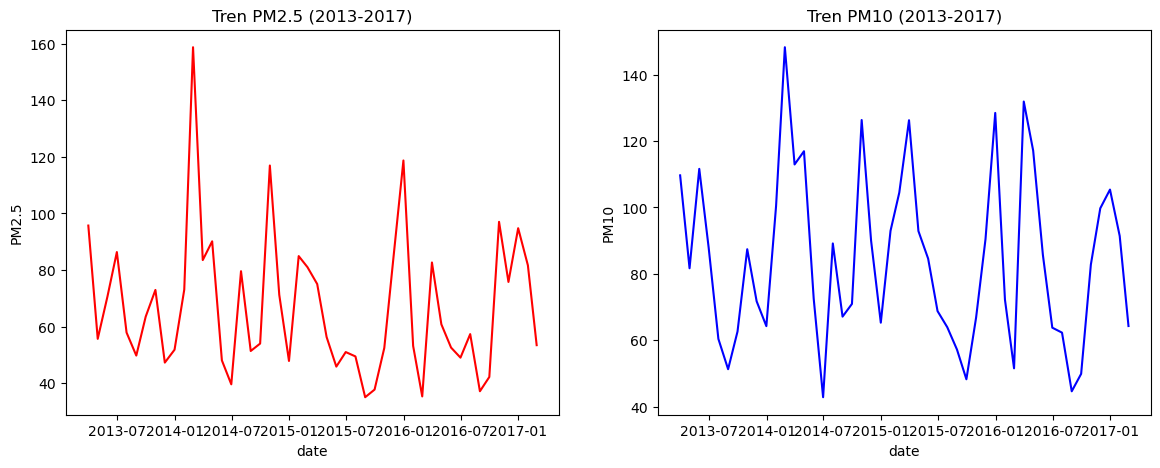

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.lineplot(data=df_Dingling.resample('M')['PM2.5'].mean(), ax=ax[0], color='red')
ax[0].set_title('Tren PM2.5 (2013-2017)')

sns.lineplot(data=df_Dingling.resample('M')['PM10'].mean(), ax=ax[1], color='blue')
ax[1].set_title('Tren PM10 (2013-2017)')

plt.show()

memvisualisasikan tren PM2.5 dan PM10 menggunakan grafik garis untuk melihat pola perubahan dari tahun 2013 hingga 2017.

**insight**
- Tren PM2.5 dan PM10 menunjukkan fluktuasi musiman, dengan peningkatan signifikan pada bulan-bulan tertentu, terutama di musim dingin.
- Tingkat polusi cenderung lebih tinggi pada periode tertentu, kemungkinan akibat faktor cuaca dan aktivitas manusia.

### Pertanyaan 2: Bagaimana dampak tingkat polusi udara terhadap kondisi lingkungan?

Menghitung korelasi antara polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) dengan parameter lingkungan (TEMP, DEWP, PRES, RAIN) untuk memahami hubungannya

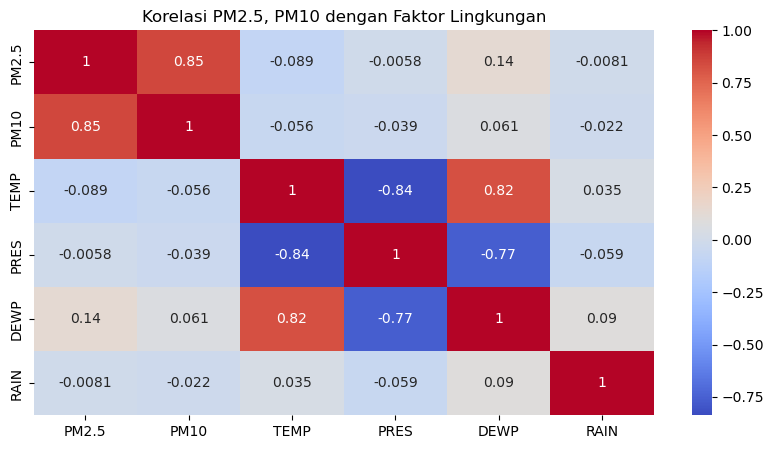

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(df_Dingling[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi PM2.5, PM10 dengan Faktor Lingkungan')
plt.show()


**Insight**
- PM2.5 dan PM10 memiliki korelasi negatif dengan suhu dan tekanan udara, yang berarti polusi cenderung meningkat saat suhu lebih rendah dan tekanan udara lebih tinggi.
- Curah hujan (RAIN) tampaknya membantu mengurangi tingkat polusi, karena partikel polutan bisa terbawa oleh hujan.

## Analisis Lanjutan (Clustering dengan Teknik Binning)

C:\Users\aryag\AppData\Local\Temp\ipykernel_9644\319177304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_Dingling['PM2.5_Category'], palette='coolwarm')


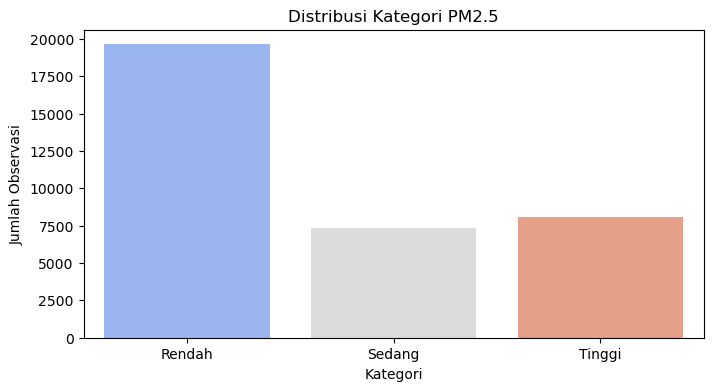

In [76]:
bins = [0, 50, 100, df_Dingling['PM2.5'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_Dingling['PM2.5_Category'] = pd.cut(df_Dingling['PM2.5'], bins=bins, labels=labels)

plt.figure(figsize=(8,4))
sns.countplot(x=df_Dingling['PM2.5_Category'], palette='coolwarm')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Observasi')
plt.show()


**Insight**
- Kategori PM2.5 menunjukkan mayoritas data berada di tingkat "Sedang" dan "Tinggi", yang mengindikasikan bahwa kualitas udara sering kali dalam kondisi tidak sehat.
- Tingkat polusi yang tinggi dapat berdampak pada kesehatan masyarakat, terutama pada kelompok rentan seperti anak-anak dan lansia.
- Binning membantu mengelompokkan data untuk analisis lebih lanjut, seperti menentukan tren berdasarkan kategori polusi atau memahami pola distribusi PM2.5.

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan analisis tren PM2.5 dan PM10 selama periode **2013-2017**, ditemukan bahwa polusi udara mengalami **fluktuasi musiman**, dengan peningkatan signifikan pada musim dingin. Hal ini menunjukkan bahwa faktor cuaca dan aktivitas manusia memengaruhi tingkat polusi. Secara umum, konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada periode tertentu, mengindikasikan adanya pola musiman dalam peningkatan polusi udara. Oleh karena itu, pemantauan kualitas udara secara berkala dan kebijakan pengendalian emisi sangat diperlukan untuk mengurangi dampak buruk polusi udara.
- Conclution pertanyaan 2:
Berdasarkan analisis, tingkat polusi udara memiliki **korelasi negatif dengan suhu dan tekanan udara**, yang berarti polusi cenderung meningkat saat suhu lebih rendah dan tekanan lebih tinggi. Selain itu, **curah hujan (RAIN) berperan dalam menurunkan konsentrasi polutan**, kemungkinan karena partikel polusi terbawa oleh air hujan. Hal ini menunjukkan bahwa faktor lingkungan memiliki dampak signifikan terhadap tingkat polusi udara. Dengan memahami pola ini, langkah mitigasi seperti peningkatan ruang hijau, pengurangan emisi industri, dan kebijakan pengendalian polusi dapat diterapkan untuk menjaga kualitas udara yang lebih baik.

In [106]:
df_Dingling.to_csv("df_Dingling", index=False)